<h1><center> Analysis of urban versus rural living</center></h1>
![](https://sustainabilityatspu.files.wordpress.com/2014/01/urban-and-rural.jpg?w=1097&h=784)

In [308]:
%matplotlib inline
import pandas as pd
import copy
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import seaborn as sns
from scipy import stats

#import corrplot

# styling
pd.set_option('display.max_columns',150)
plt.style.use('bmh')
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

In [309]:
young = pd.read_csv('../../datasets/from_our_childhood.csv')

In [310]:
# Si bien la función 'describe' nos da todos los datos ya calculados (salvo la moda),
# los vamos a pasar a calcular nuevamente en la siguiente sección
young[['Age', 'Weight']].dropna().describe()

,Age,Weight
count,987.000000,987.000000
mean,20.437690,66.426545
std,2.839328,13.850382
min,15.000000,41.000000
25%,19.000000,55.000000
50%,20.000000,64.000000
75%,22.000000,75.000000
max,30.000000,165.000000


## Estadisticas descriptivas

En la siguiente sección mostraremos algunas estadísticas descriptivas, con sus respectivos gráficos, sobre las variables: Edad, Peso y Género. Se realizará un análisis de outliers como así también se analizará la correlación entre estas variables.

In [311]:
def get_data_statistics(data, var_name):
    mean = np.mean(data)
    median = np.median(data)
    mode= stats.mode(data)
    sd = np.std(data)

    print(
        '''
        Variable {var_name} \n
        \t Media: {0}\n
        \t Mediana: {1}\n
        \t Moda: {2} ({3} repeticiones) \n
        \t Desviación estandard: {4}
        '''.format(
            mean,
            median,
            mode.mode,
            mode.count,
            sd,
            var_name=var_name
        )
    )

    return (mean, sd)

def show_data_distribution(data, var_name, mean, sd, **kwargs):
    _, ax = plt.subplots(figsize=(15, 5))
    plt.xlabel(var_name)
    plt.title(r'$\mathrm{Histograma\ de\ la\ %s:}\ \mu=%.3f,\ \sigma=%.3f$' % (var_name, mean, sd))
    plt.grid(True)

    n, bins, patches = plt.hist(data, edgeColor='black', **kwargs)
    
    # Agregamos una linea que representa el mejor ajuste a los datos
    # utilizando los valores de mu y sigma obtenidos anteriormente
    y = mlab.normpdf(bins, mean, sd)
    l = plt.plot(bins, y, 'r--', linewidth=2)

    plt.show()

In [312]:
# Media, Mediana, Moda y desviación estandard para la variable "Peso", independiente del género.
weight_without_na = young[['Weight']].dropna().Weight

weight_mean, weight_sd = get_data_statistics(weight_without_na, 'Peso')


        Variable Peso 

        	 Media: 66.40505050505051

        	 Mediana: 64.0

        	 Moda: [60.] ([76] repeticiones) 

        	 Desviación estandard: 13.832569338065822
        


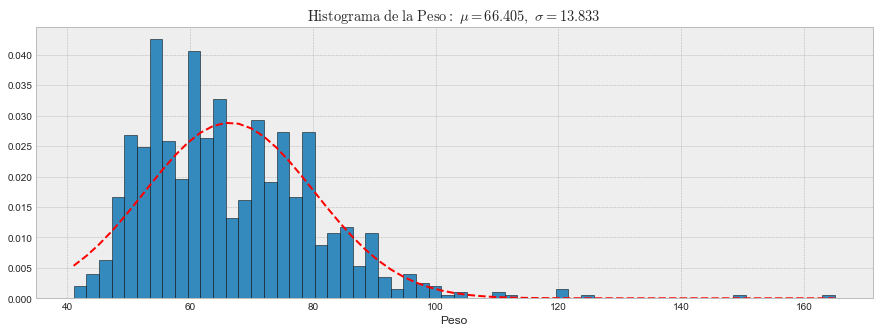

In [313]:
# Histograma del peso con 60 bins y linea de ajuste.
show_data_distribution(young[['Weight']].dropna().Weight, 'Peso', weight_mean, weight_sd, bins=60, normed=True)

In [314]:
# Media, Mediana, Moda y desviación estandard para la variable "Edad", independiente del género.
age_without_na = young[['Age']].dropna().Age

age_mean, age_sd = get_data_statistics(age_without_na, 'Edad')


        Variable Edad 

        	 Media: 20.43369890329013

        	 Mediana: 20.0

        	 Moda: [19.] ([210] repeticiones) 

        	 Desviación estandard: 2.8274295576298125
        


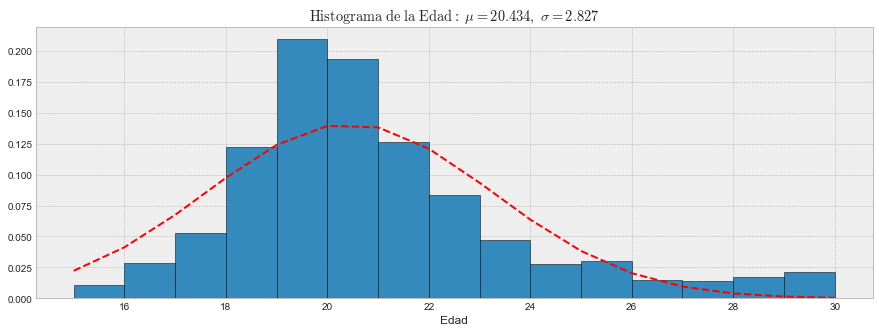

In [315]:
# Histograma de la edad con 15 bins y linea de ajuste.
show_data_distribution(age_without_na, 'Edad', age_mean, age_sd, bins=15, normed=True)

#### Análisis de la distribución del peso y la edad

Ambos histogramas nos muestran que tanto el peso como la edad responden a una distribución normal.

En el caso del peso $\mu: 66.405$ y $\sigma: 13.833$

En el caso de la edad $\mu: 20.434$ y $\sigma: 2.827$

### Outliers

Una forma de ver y analizar los _outliers_ es a través de un gráfico **boxplot**. 

Seaborn nos facilita esto a través de la función **boxplot** que proporciona además una forma de visualizar los datos outliers.

In [316]:
# Función genérica que grafica un boxplot del dataset proporcionado
# Los 'outliers' se obtienen usando un método que es una función del rango interquartil.
def get_data_boxplot(dataset, **kwargs):
    _, ax = plt.subplots(figsize=(20, 5))
    sns.set_style("whitegrid")
    sns.boxplot(x=dataset, **kwargs)
    
    sns.despine()

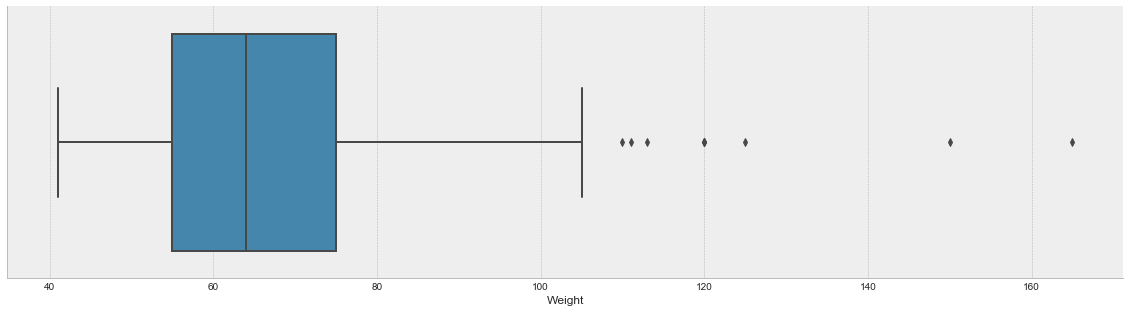

In [317]:
get_data_boxplot(weight_without_na)

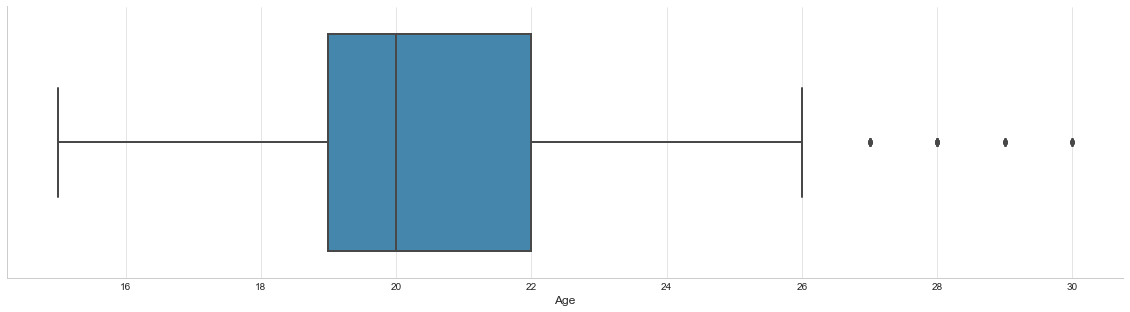

In [318]:
get_data_boxplot(age_without_na) 

#### Análisis sobre los outliers

DS = _Desviación estandard_

Para la variable **Peso**, los outliers representan a las personas con sobrepeso (por encima de las 108 lbs.) y del total de la muestra, de 990 entradas, estas representan ~1% del total (9 registros). En base a los datos calculados para la variable en cuestión, estos datos están 3 DS por encima de la media. No existen outliers por 3 DS por debajo de la media ya que el registro mínimo registrado es de 41 lbs.

Para la variable **Edad**, sucede algo similar. Los outliers representan a las personas estrictamente mayores a los 26 años. Dado que la media para esta variable es de **20,434** y la desviación estandard es de **2.83**. Los valores que caigan por fuera de **26** (2 veces la DS sobre la media) son considerados outliers. Dado que el dato mínimo registrado es de una persona de **15** años, al estar dentro del rango de 2 DS, no se considera outlier.

En general los valores _outliers_  son indicativos de que los datos pueden pertenecer a una población diferente del resto de las muestras. Las estadísticas descriptivas derivadas de esto pueden ser engañosas si consideramos a la media. En ese caso la mediana puede resultar de más utilidad.

Veamos los valores que se identifican como outliers para el caso del peso, basados en el boxplot anterior. Los outliers se encuentra arriba de 108kgs: $\mu + 3 * \sigma = 108$.

In [319]:
display(young[young['Weight']>108][['Age', 'Height' , 'Weight', 'Gender']])

,Age,Height,Weight,Gender
292,21.0,184.0,120.0,female
612,23.0,172.0,110.0,male
715,29.0,183.0,111.0,male
793,24.0,185.0,120.0,male
796,27.0,189.0,113.0,male
859,20.0,190.0,125.0,male
885,23.0,NaN,165.0,female
973,20.0,175.0,120.0,female
992,30.0,200.0,150.0,male


something about outliers....


        Variable Peso 

        	 Media: 65.85830784913354

        	 Mediana: 64.0

        	 Moda: [60.] ([76] repeticiones) 

        	 Desviación estandard: 12.542011147332227
        


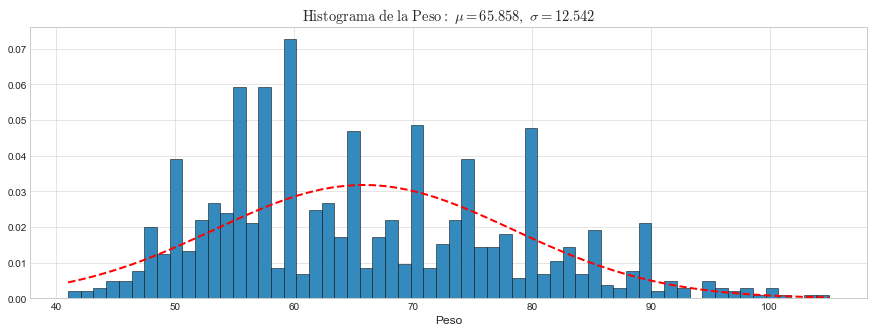

In [320]:
#weight_without_outliers = weight_without_na.drop([885, 992])
weight_without_outliers = weight_without_na[weight_without_na<=108]

new_weight_mean, new_weight_sd = get_data_statistics(weight_without_outliers, 'Peso')
show_data_distribution(weight_without_outliers, 'Peso', new_weight_mean, new_weight_sd, bins=60, normed=True)

### Análisis de género

En la siguiente sección se analizarán las mismas métricas pero teniendo en cuenta el género. Además, se analizará la correlación entre las variables **Peso** y **Edad**.

In [321]:
# Calculo de métricas para la Edad.

age_and_gender_without_na = young[['Age', 'Gender']].dropna()
age_male = age_and_gender_without_na[age_and_gender_without_na.Gender == 'male'].Age
age_female = age_and_gender_without_na[age_and_gender_without_na.Gender == 'female'].Age

# Media, Mediana, Moda y desviación estandard para la variable "Edad", de género "Masculino"
age_male_mean, _ = get_data_statistics(age_male, 'Edad, género Masculino')

# Media, Mediana, Moda y desviación estandard para la variable "Edad", de género "Femenino"
age_female_mean, _ = get_data_statistics(age_female, 'Edad, género Femenino')


        Variable Edad, género Masculino 

        	 Media: 20.87286063569682

        	 Mediana: 20.0

        	 Moda: [19.] ([80] repeticiones) 

        	 Desviación estandard: 2.7933683048767595
        

        Variable Edad, género Femenino 

        	 Media: 20.113752122241088

        	 Mediana: 20.0

        	 Moda: [19.] ([129] repeticiones) 

        	 Desviación estandard: 2.790165425784379
        


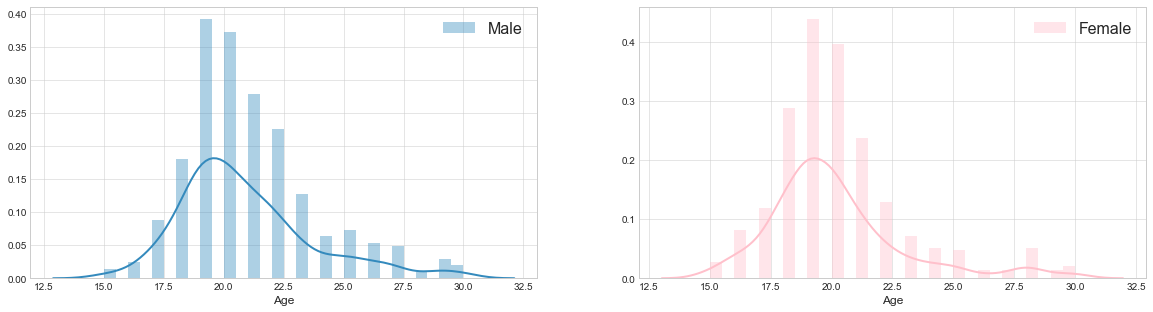

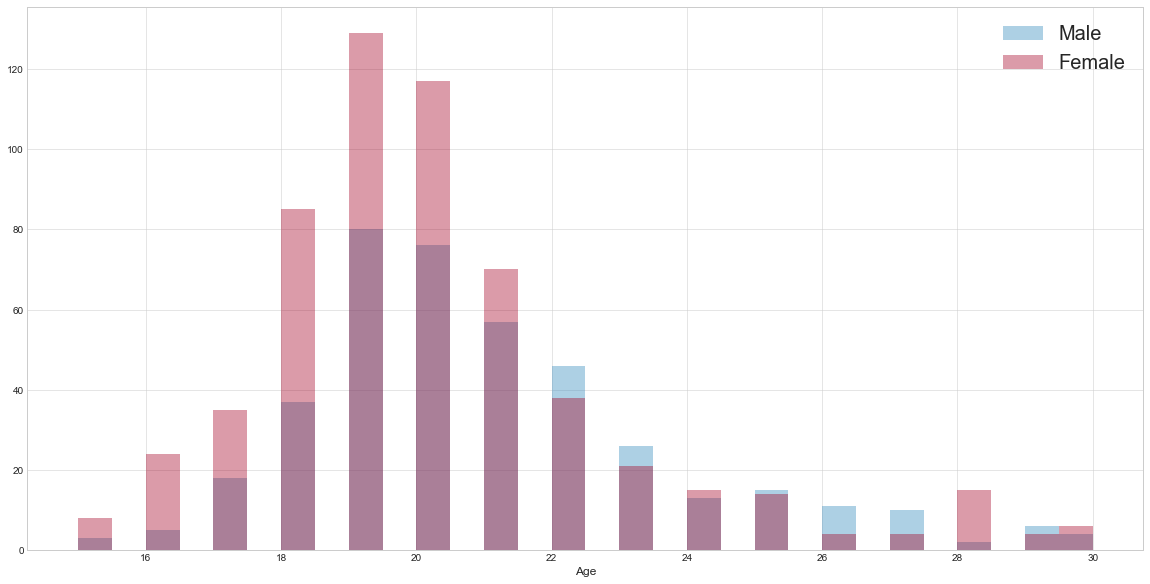

In [322]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

male_age_hist = sns.distplot(age_male, label = 'Male', ax = ax[0], kde = True, bins = 30)
female_age_hist = sns.distplot(age_female, label = 'Female', ax = ax[1], kde = True, bins = 30, color = 'pink')
ax[0].legend(loc=1, prop={'size': 16})
ax[1].legend(loc=1, prop={'size': 16})

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

_ = sns.distplot(age_male, label = 'Male', kde = False, bins = 30)
_ = sns.distplot(age_female, label = 'Female', kde = False, bins = 30)
ax.legend(loc=1, prop={'size': 20})

#### Variables descriptivas por gérero para la Edad

A partir de los datos obtenidos para la **Edad** disgregada por género, se puede observar que la distribción en ambos casos es similar. Tanto para los hombres como para las mujeres los gráficos se corresponden con una distrubución normal. De hecho, se puede ver que los valores para las métricas analizadas con anterioridad son las mismas en ambos casos. La única diferencia es la cantidad de muestras por categoría (género).

###### Falta mas análisis

In [323]:
# Calculo de métricas para el Peso.

weight_and_gender_without_na = young[['Weight', 'Gender']].dropna()
weight_male = weight_and_gender_without_na[weight_and_gender_without_na.Gender == 'male'].Weight
weight_female = weight_and_gender_without_na[weight_and_gender_without_na.Gender == 'female'].Weight

# Media, Mediana, Moda y desviación estandard para la variable "Edad", de género "Masculino"
weight_male_mean, _ = get_data_statistics(weight_male, 'Peso, género Masculino')

# Media, Mediana, Moda y desviación estandard para la variable "Edad", de género "Femenino"
weight_female_mean, _ = get_data_statistics(weight_female, 'Peso, género Femenino')


        Variable Peso, género Masculino 

        	 Media: 77.08888888888889

        	 Mediana: 77.0

        	 Moda: [80.] ([45] repeticiones) 

        	 Desviación estandard: 11.335816721380985
        

        Variable Peso, género Femenino 

        	 Media: 58.963793103448275

        	 Mediana: 57.0

        	 Moda: [60.] ([61] repeticiones) 

        	 Desviación estandard: 9.997089201808594
        


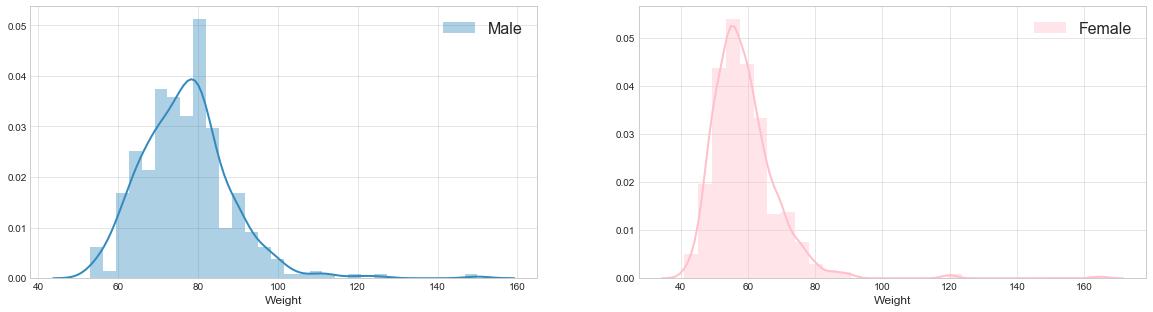

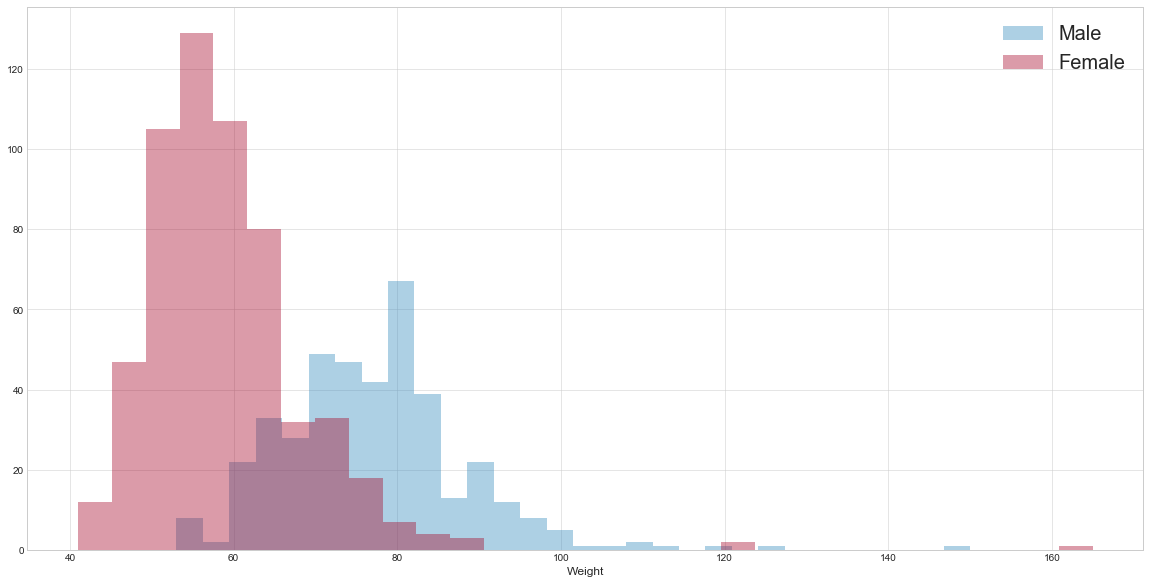

In [324]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

male_weight_hist = sns.distplot(weight_male, label = 'Male', ax = ax[0], kde = True, bins = 30)
female_weight_hist = sns.distplot(weight_female, label = 'Female', ax = ax[1], kde = True, bins = 30, color = 'pink')
ax[0].legend(loc=1, prop={'size': 16})
ax[1].legend(loc=1, prop={'size': 16})

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

_ = sns.distplot(weight_male, label = 'Male', kde = False, bins = 30)
_ = sns.distplot(weight_female, label = 'Female', kde = False, bins = 30)
ax.legend(loc=1, prop={'size': 20})

#### Variables descriptivas por gérero para el Peso

A partir de los datos obtenidos para el **Peso** disgregado por género, se puede observar que la distribción en ambos casos, al igual que con la Edad, es similar. Tanto para los hombres como para las mujeres los gráficos se corresponden con una distrubución normal.

Aca es donde empezamos a ver más diferencias en la métricas calculadas como así también los valores de la distribución normal para ambas categorías.

En general y por cuestiones que estan relacionadas a la biología, la cultura y la influencia social, los hombres tienden a tener una media en el peso mucho más alto que las mujeres. Esto se puede ver en el valor que adquiere la variable de la media $\mu$ en el tercer gráfico. 

Lo mismo sucede con la variable de la desviación estandard $\sigma$. Para los hombre, la campana de Gauss es más suave que para las mujeres lo cual nos lleva a decir que los valores del Peso están en general más distribuidos que en las mujeres. Como se dijo anteriormente, debido a multiples factores biológicos y socio-culturales, es interesante ver la concentración de la muestra alrededor de la media por lo cual la campana es mucho más empinada. Esta tendencia se podría seguir observando de la misma forma si se tuvieran más datos. 

La moda nos indica que del total de muestras, fue más frecuente encontrar hombre con un peso aproximado de 80Kg mientras que en el caso de las mujeres este valor se ubica en los 60Kgs.

#### Correlación entre todas estas variables

Hay diferentes enfoques para para analizar 2 variables donde se encuentran datos faltantes.

Las medias para Edad y Peso se puede calcular:

1. Antes de remover nans en el dataset.
2. Luego de remover datos donde Edad y Peso son ambos nan, para todos los datos donde Gender no es nan.
3. Luego de disgregar los datos por género.

Dado que la cantidad de datos filtrados en cada caso es despreciable en comparación con la cantidad de datos totales, los resultados no varían demasiado. De todas formas, consideramos que el enfoque (3) es más adecuado.

In [400]:
def print_corr_by_gender(male_ds, female_ds):
    # Another way of getting correlation
    # male_pearsonr = stats.pearsonr(
    #     male.Age,
    #     male.Weight
    # )

    # female_pearsonr = stats.pearsonr(
    #     female.Age,
    #     female.Weight
    # )

    male_weight_age_corr = male_ds.corr().Weight.Age
    female_weight_age_corr = female_ds.corr().Weight.Age

    print('#1\nMale r: {0}, Female r: {1}\n'.format(male_weight_age_corr, female_weight_age_corr))

####### 1 #######

# Get means for the whole dataset and fill nans with it
mean_values = young.mean(axis=0)

young_with_means = young.fillna(mean_values)
male = young_with_means[young_with_means.Gender == 'male']
female = young_with_means[young_with_means.Gender == 'female']

print_corr_by_gender(male, female)

####### 2 #######

# Remove any rows with Gender as 'nan' and any row with Age AND Weight as 'nan'
young_with_means = young[['Age', 'Weight', 'Gender']].dropna(axis=0, subset=['Gender']).dropna(thresh=2)

# Get means for dataset without nans and fill nans with it
mean_values = young_with_means.mean(axis=0)
young_with_means.fillna(mean_values, inplace=True)
male = young_with_means[young_with_means.Gender == 'male']
female = young_with_means[young_with_means.Gender == 'female']

print_corr_by_gender(male, female)

####### 3 #######

# Remove any rows with Gender as 'nan' and any row with Age AND Weight as 'nan'
young_subset = young[['Age', 'Weight', 'Gender']].dropna(axis=0, subset=['Gender']).dropna(thresh=2)

# Get means for males and fill nans with it
male = young_subset[young_subset.Gender == 'male']
male_means = male.mean(axis=0)
male = male.fillna(male_means)

# Get means for females and fill nans with it
female = young_subset[young_subset.Gender == 'female']
female_means = male.mean(axis=0)
female = female.fillna(male_means)

print_corr_by_gender(male, female)

#1
Male r: 0.250257637106967, Female r: 0.15257867266226405

#1
Male r: 0.25009314253339193, Female r: 0.152502467658486

#1
Male r: 0.2532522752495907, Female r: 0.14569046513663603



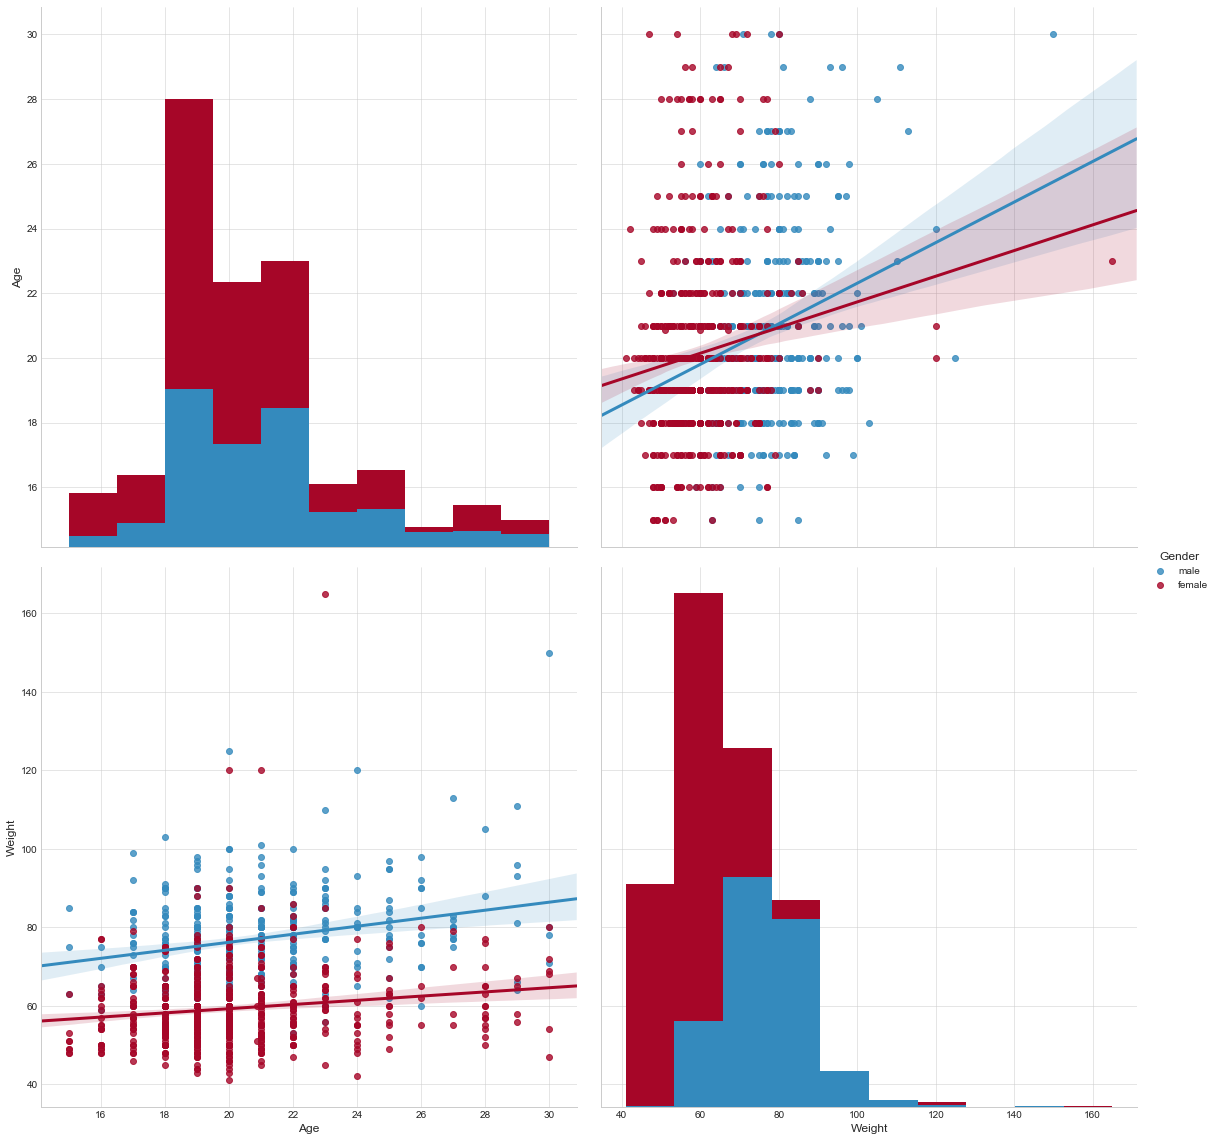

In [399]:
# Get rows with nan values
# young_subset[young_subset.isnull().any(axis=1)]

# Create 1 dataframe with male and female data, with their respective medians
df = male.append(female)

sns.pairplot(df, kind='reg', hue='Gender', size=8)

In [ ]:
# Changing a categorical column to be able to do correlation
# Make sure not to change the original dataset
# young_with_means.Gender = young_with_means.Gender.astype('category').cat.codes